In [188]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [189]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [190]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [191]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [192]:
def naiveStrand(p, t):
    r = reverseComplement(p) # reverse comp sequence
    occurrences = [] # initiate the list of match index
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        matchP = True # forward stand matched
        matchR = True # reverse strand matched
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                matchP = False  # loop over characters
                break
        for k in range(len(r)):
            if t[i+k] != r[k]:  # compare characters
                matchR = False  
                break
        if matchP or matchR:
            occurrences.append(i)  # all chars matched; record
    return occurrences
    

In [193]:
# Question 1:
len(naiveStrand('AGGT', virusGenome))

306

In [194]:
naiveStrand('ACT', 'CAGTAGT') # Test the new naiveStrand

[1, 4]

In [195]:
virusGenome = readGenome('lambda_virus.fa')

In [196]:
len(naiveStrand('AGGT', virusGenome))

306

In [197]:
len(naive('AGGT', virusGenome)) + len(naive('ACCT', virusGenome))

306

In [220]:
# Question 2:
len(naiveStrand('TTAA', virusGenome))

195

In [219]:
# Question 3:
min(naiveStrand('ACTAAGT', virusGenome))

26028

In [200]:
# Question 4: 
naiveStrand('AGTCGA', virusGenome)[0]

450

In [201]:
def naive_2mm(p, t):
    occurences = []
    pLen = len(p)
    readRange = len(t) - pLen +1
    
    for i in range(readRange):
        matched = True
        errors = 0
        for j in range(pLen):
            if t[i+j] != p[j]:
                errors += 1
            if errors > 2: # if there are more than 2 errors
                matched = False # it doesnt match
                break
        if matched:
            occurences.append(i)
    return occurences

In [202]:
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)

[10, 24, 38]


In [203]:
!curl http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa > phix.fa

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5528  100  5528    0     0   7593      0 --:--:-- --:--:-- --:--:--  7593


In [204]:
# read phix_genome
phix_genome = readGenome('phix.fa')

In [205]:
occurrences = naive_2mm('GATTACA', phix_genome)

In [206]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 10


In [207]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 10


In [208]:
# Question 5: 
len(naive_2mm('TTCAAGCC', virusGenome))

191

In [209]:
# Question 6:
min(naive_2mm('AGGAGGTT', virusGenome))

49

In [210]:
!curl https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq > dna.fastq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  235k  100  235k    0     0   236k      0 --:--:-- --:--:-- --:--:--  236k


In [211]:
naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

In [212]:
len(naive_2mm('TTCAAGCC', virusGenome))

191

In [213]:
def readFastq(fileName):
    seqs = []
    quals = []
    with open(fileName) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            if len(seq) == 0 : 
                break
            fh.readline()
            qual = fh.readline().rstrip()
            seqs.append(seq)
            quals.append(qual)
    return seqs, quals

In [214]:
def phredToQ(qual):
    return ord(qual) - 33

In [232]:
seqs, quals = readFastq('dna.fastq')

In [225]:
def distribution(quals):
    leng = len(quals)
    hist = [0] * 60 # count of each quality value
    for qual in quals:
        for phred in qual:
            q = phredToQ(phred)
            hist[q] += 1
    return hist

In [233]:
hist = distribution(quals)

<Container object of 60 artists>

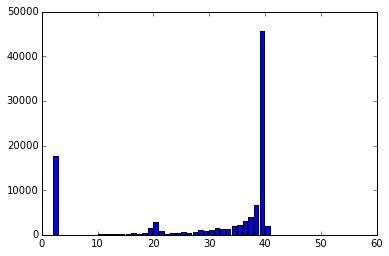

In [234]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.bar(range(len(hist)), hist)

In [ ]:
print(hist)

In [ ]:
len(quals[0])

In [ ]:
quals[0]

In [ ]:
# last question:
# GC content:
def findGCByPos(reads):
    gc = [0] * 100 # number of G or C for each read
    totals = [0] * 100 # total number of nu
    for read in reads:
        for i in range(100):
            if read[i] == 'G' or read[i] == 'C':
                gc[i] += 1
            totals[i] += 1
    for i in range(100):
        if gc[i] > 0:
            gc[i] /= float(totals[i])
    return gc

In [235]:
GC = findGCByPos(seqs)

<Container object of 10 artists>

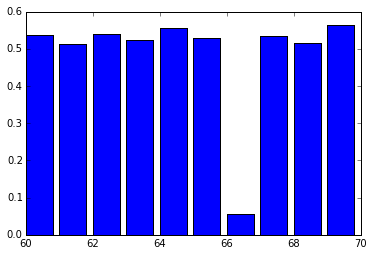

In [238]:
plt.bar(range(60, 70), GC[60:70])

### Question 7: 
66? 

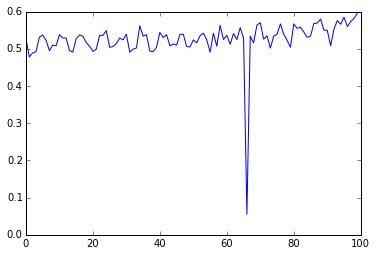

In [237]:
plt.plot(range(100), GC)

In [239]:
import collections 
count = collections.Counter() # create a variable count
for seq in seqs: # for each seq of seqs
    count.update(seq) # update the counter
print(count)

Counter({'C': 29665, 'A': 24057, 'G': 22888, 'T': 22476, 'N': 914})


In [ ]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
print(count)